In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import lstsq

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Dataset/BikeSharingCount.csv')
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  01-01-2011       1   0     1   0        0        6           0   
1        2  01-01-2011       1   0     1   1        0        6           0   
2        3  01-01-2011       1   0     1   2        0        6           0   
3        4  01-01-2011       1   0     1   3        0        6           0   
4        5  01-01-2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# EDA

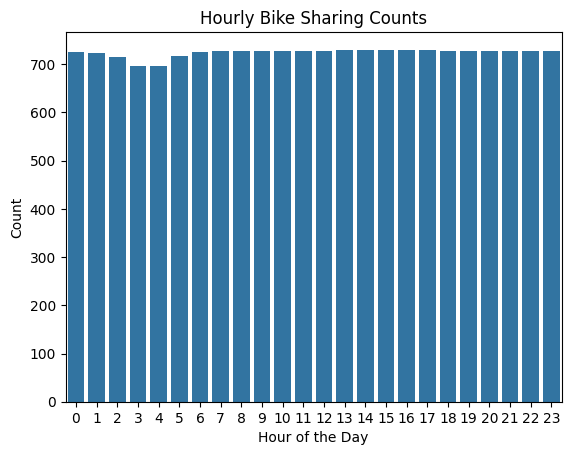

In [3]:
# Countplot for bike rentals by hour
sns.countplot(x='hr', data=df)
plt.title('Hourly Bike Sharing Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

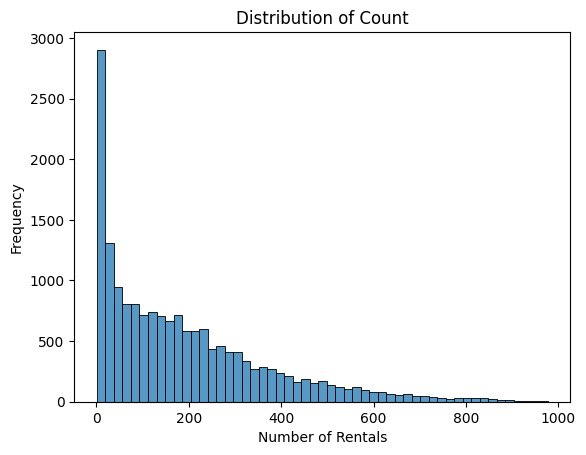

In [4]:
# Histogram for distribution of total rentals (cnt)
sns.histplot(df['cnt'])
plt.title('Distribution of Count')
plt.xlabel('Number of Rentals')
plt.ylabel("Frequency")
plt.show()

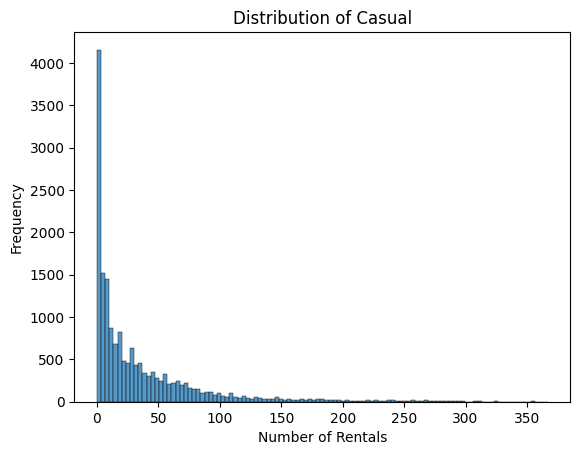

In [5]:
# Histogram for casual user rentals
sns.histplot(df['casual'])
plt.title('Distribution of Casual')
plt.xlabel('Number of Rentals')
plt.ylabel("Frequency")
plt.show()

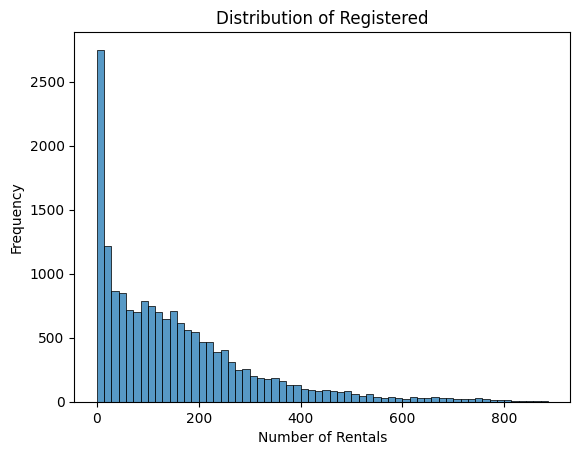

In [6]:
# Histogram for registered user rentals
sns.histplot(df['registered'])
plt.title('Distribution of Registered')
plt.xlabel('Number of Rentals')
plt.ylabel("Frequency")
plt.show()

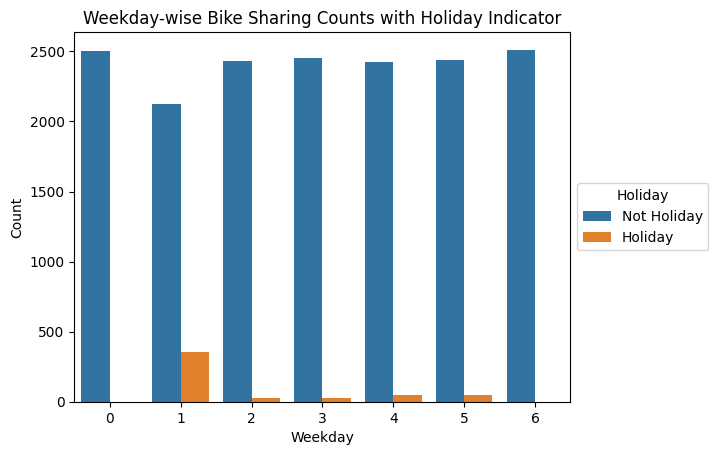

In [7]:
# Countplot for weekday rentals with holiday indicator
sns.countplot(x='weekday', data=df, hue='holiday')
plt.title('Weekday-wise Bike Sharing Counts with Holiday Indicator')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Holiday', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Not Holiday', 'Holiday'])
plt.show()

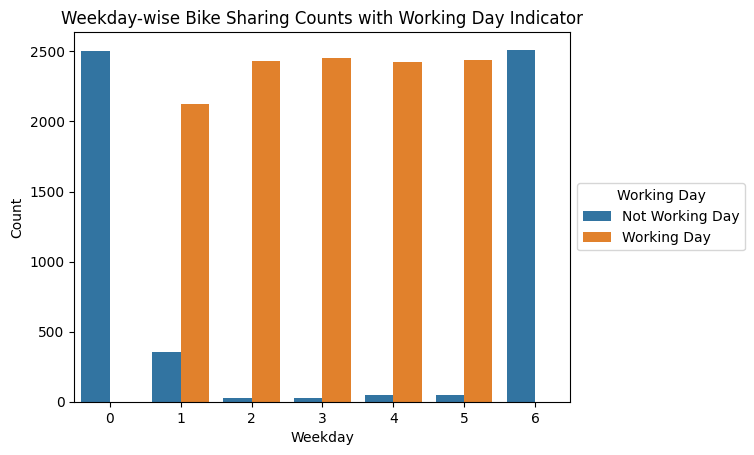

In [8]:
# Countplot for weekday rentals with working day indicator
sns.countplot(x='weekday', data=df, hue='workingday')
plt.title('Weekday-wise Bike Sharing Counts with Working Day Indicator')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Working Day', loc='center left', bbox_to_anchor=(1, 0.5), labels=['Not Working Day', 'Working Day'])
plt.show()

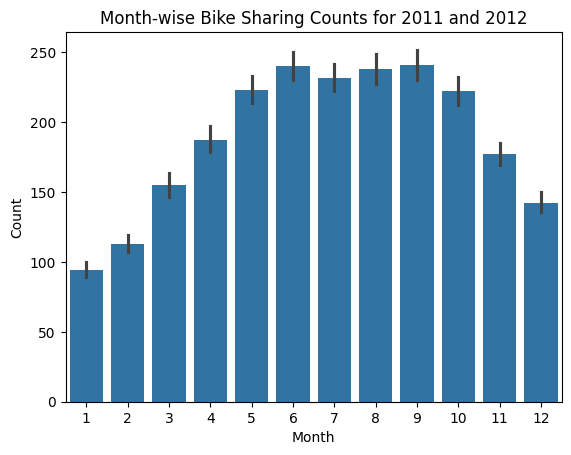

In [9]:
# Barplot for month-wise bike rentals
sns.barplot(x='mnth', y='cnt', data=df)
plt.title('Month-wise Bike Sharing Counts for 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

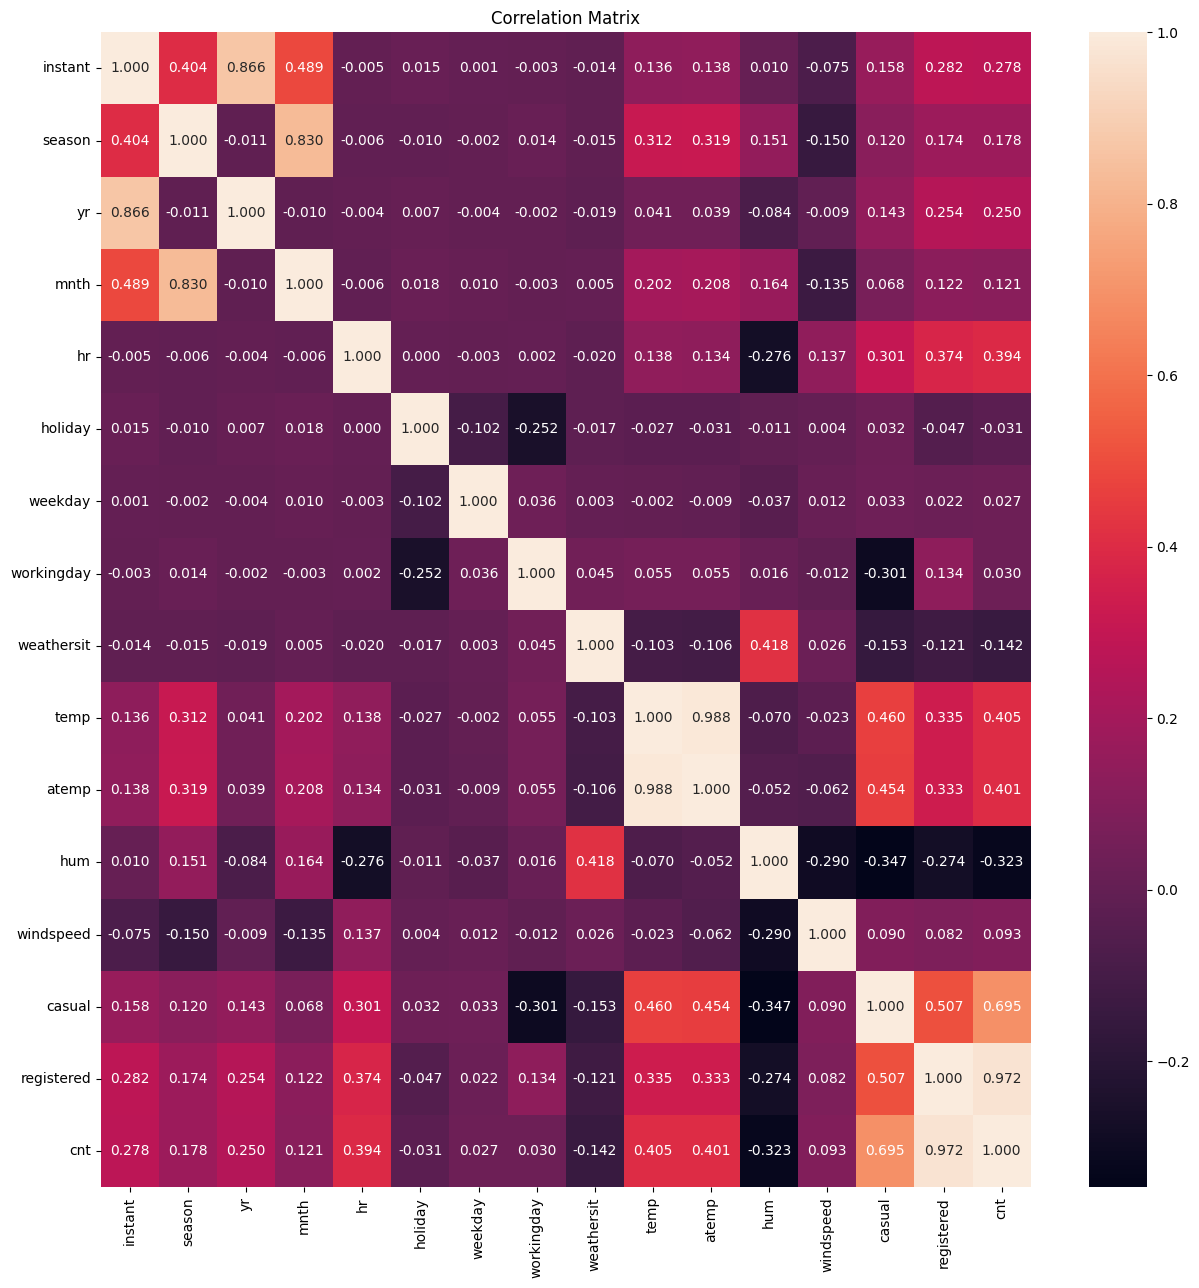

In [10]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(numeric_df.corr(), annot=True,fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

# DATA PREPROCESSING

In [11]:
# Defining categorical and continuous columns
categorical_columns = ['season','hr','yr','mnth','holiday','weekday','workingday','weathersit']
continuous_columns = ['temp','atemp','hum','windspeed']

In [12]:
# Scaling continuous variables using MinMaxScaler
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output=False)

In [13]:
# Encoding categorical variables using OneHotEncoder
x_scaled = scaler.fit_transform(df[continuous_columns])
x_encoded = encoder.fit_transform(df[categorical_columns])

In [14]:
# Combining scaled continuous and encoded categorical data
x_combined = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(x_encoded)],axis=1)
y_train = df['cnt']

In [15]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_combined, y_train, test_size = 0.2, random_state = 42)

# LINEAR REGRESSION (Normal Equation)

In [16]:
# Extract features for linear regression
X_linear = df[['temp','atemp','hum','windspeed']].values
y_linear = df['cnt'].values

In [17]:
# Add a bias (intercept) column to X_linear
X_linear = np.column_stack((np.ones(len(X_linear)),X_linear))

In [18]:
# Solve for the linear regression coefficients using least squares method
theta, residuals, rank, s = lstsq(X_linear,y_linear)

print('Coefficients (Theta):',theta)

Coefficients (Theta): [ 161.80690219   85.57649678  314.34292899 -275.18031254   42.97925525]


# LINEAR REGRESSION (Scikit-learn)

In [20]:
# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [21]:
# Predict the target variable for test set
y_pred = linear_model.predict(X_test)

In [22]:
# Calculate and print Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

r2 = r2_score(y_test,y_pred)
print('R2 Score: ',r2)

Mean Squared Error:  10084.841196777905
R2 Score:  0.6815187053904738


In [23]:
# Save the model using joblib
joblib.dump(linear_model, '../Artifacts/Logistic_Regression_model.pkl')

['../Artifacts/Logistic_Regression_model.pkl']

# POLYNOMIAL REGRESSION

In [24]:
# Transform features to polynomial features of degree 2
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_transformed_poly = poly_features.fit_transform(x_combined)

In [25]:
# Define the target variable
y = df['cnt'].values

In [26]:
# Splitting the transformed polynomial features for training and testing
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(x_transformed_poly, y, test_size = 0.2, random_state = 42)

In [27]:
# Train a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train_poly)

LinearRegression()

In [28]:
# Predict for training and testing sets
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

In [29]:
# Calculate and print R-squared scores for training and testing data
mse_poly = mean_squared_error(y_test_poly,y_test_pred_poly)
r2_train_poly = r2_score(y_train_poly,y_train_pred_poly)
print('R2 SCORE FOR TRAINING DATA: ',r2_train_poly)

r2_test_poly = r2_score(y_test_poly,y_test_pred_poly)
print('R2 SCORE FOR TESTING DATA: ',r2_test_poly)

R2 SCORE FOR TRAINING DATA:  0.92908918617298
R2 SCORE FOR TESTING DATA:  -2.525184666791953e+19


In [30]:
# Save the model using joblib
joblib.dump(poly_model, '../Artifacts/Polynomial_Regression_model.pkl')

['../Artifacts/Polynomial_Regression_model.pkl']

# REGULARISATION

## RIDGE

In [31]:
# Initialize models with regularization parameters
rdg = Ridge(alpha = 0.4)

In [32]:
# Train and predict using Ridge regression
rdg.fit(X_train_poly,y_train_poly)
y_pred = rdg.predict(X_test_poly)

In [33]:
# Calculate and print MSE and R-squared score for Ridge regression
mse = mean_squared_error(y_test_poly,y_pred)
print('MSE: ',mse)

r2 = r2_score(y_test_poly,y_pred)
print('R2 SCORE: ',r2)

MSE:  2683.401349099723
R2 SCORE:  0.9152576506716559


In [34]:
# Save the model using joblib
joblib.dump(rdg, '../Artifacts/Ridge_Regularisation.pkl')

['../Artifacts/Ridge_Regularisation.pkl']

## LASSO

In [35]:
# Initialize models with regularization parameters
lso = Lasso(alpha = 0.4)

In [36]:
# Train and predict using Lasso regression
lso.fit(X_train_poly,y_train_poly)
y_pred = lso.predict(X_test_poly)

In [37]:
# Calculate and print MSE and R-squared score for Lasso regression
mse = mean_squared_error(y_test_poly,y_pred)
print('MSE: ',mse)

r2 = r2_score(y_test_poly,y_pred)
print('R2 SCORE: ',r2)

MSE:  4387.254935879527
R2 SCORE:  0.8614496148727292


In [38]:
# Save the model using joblib
joblib.dump(lso, '../Artifacts/Lasso_Regularisation.pkl')

['../Artifacts/Lasso_Regularisation.pkl']

## ELASTICNET

In [39]:
# Initialize models with regularization parameters
eln = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [40]:
# Train and predict using ElasticNet regression
eln.fit(X_train_poly,y_train_poly)
y_pred = eln.predict(X_test_poly)

In [41]:
# Calculate and print MSE and R-squared score for ElasticNet regression
mse = mean_squared_error(y_test_poly,y_pred)
print('MSE: ',mse)

r2 = r2_score(y_test_poly,y_pred)
print('R2 SCORE: ',r2)

MSE:  6715.628327382986
R2 SCORE:  0.7879191191920122


In [42]:
# Save the model using joblib
joblib.dump(eln, '../Artifacts/ElasticNet_Regularisation.pkl')

['../Artifacts/ElasticNet_Regularisation.pkl']